In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
seed = 2022

In [6]:
csv_file = "cleaned_EThOS_CSV_202210.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

/var/folders/l7/bnn1j6bs3bqfskq2jlq55yh80000gr/T/ipykernel_55614/740333908.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding="ISO-8859-2")


,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,


## Create new column concatenating Title and Abstract

In [52]:
df["Text"] = df["Title"] + ' ' + df["Abstract"]

## Tokenizing the text using Spacy

In [56]:
import spacy
nlp = spacy.load('en_core_web_md')

In [57]:
docs = list(nlp.pipe(df["Text"], n_process=6))

In [59]:
df["Tokens"] = [[token.lemma_.lower() for token in doc
                 if not token.is_stop and token.is_alpha and token.is_ascii]
                for doc in docs]

In [63]:
df.head()

,Unnamed: 0,Title,DOI,Author,Author ISNI,ORCID,Institution,Institution ISNI,Date,Qualification,Abstract,Subject Discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,Text,Tokens
0,0,Computation and measurement of turbulent flow ...,,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,,University of Manchester,https://isni.org/isni/0000000121662407,1989,Thesis (Ph.D.),,Physical Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Computation and measurement of turbulent flow ...,"[computation, measurement, turbulent, flow, id..."
1,1,Prolactin and growth hormone secretion in norm...,,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983,Thesis (Ph.D.),,Biological Sciences,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Prolactin and growth hormone secretion in norm...,"[prolactin, growth, hormone, secretion, normal..."
2,2,Influence of strain fields on flame propagation,,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,,University of Cambridge,https://isni.org/isni/0000000121885934,1983,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,Influence of strain fields on flame propagatio...,"[influence, strain, field, flame, propagation,..."
3,3,"Connectivity, flow and transport in network mo...",,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,,University of Oxford,https://isni.org/isni/0000000419368948,1984,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...,"Connectivity, flow and transport in network mo...","[connectivity, flow, transport, network, model..."
4,4,The theory and implementation of a high qualit...,,"Lower, K. N.",https://isni.org/isni/0000000136133567,,University of Bristol,https://isni.org/isni/0000000419367603,1985,Thesis (Ph.D.),,Engineering & Technology,,,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,,The theory and implementation of a high qualit...,"[theory, implementation, high, quality, pulse,..."


Want to also work with Bigrams as only considering individual words can miss some things. Could maybe go further but will see what this does...

In [73]:
df["Tokens_with_Bigrams"] = [toks + [toks[i] + '-' + toks[i+1] for i in range(len(toks)-1)]
                             if len(toks) > 1 else toks
                             for toks in df["Tokens"]]

In [85]:
df.to_pickle("../EThOS_CSV_202210_with_tokens.pkl")

## Using Gensim for LDA

In [ ]:
csv_file = "EThOS_CSV_202210_with_tokens.csv"
df = pd.read_csv(csv_file, encoding="ISO-8859-2")
df.head()

In [147]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LdaMulticore, CoherenceModel, LsiModel, HdpModel

With Latent Dirichlet Allocation (LDA), the goal is to learn the topic mix in each document, and the word mix in each document. So we first define the number of topics, which has a distribution over the words in the dictionary. We also can obtain a distribution of topics for each document. We can get `gensim` to do this for us.

To perform LDA, I need to obtain a dictionary (give each token a unique ID), and a corpus which contains each ID and its frequency.

Here, we also just focus on a particular subject (Computer Science)

In [176]:
comp_sci_df = df[df["Subject Discipline"] == "Computer Science"]
tokens = comp_sci_df["Tokens_with_Bigrams"]

In [177]:
# maps each word to their unique ID
dictionary = Dictionary(tokens)

In [178]:
len(dictionary)

594661

Here, I want to filter out any low-frequency and high-frequency tokens. In particular, I take out any words that appear in less than 5 documents and any words that appear in more than 50% of the documents. To reduce computation, we also only keep the 100000 most frequent tokens after those removals.

In [179]:
dictionary.filter_extremes(no_below=5, no_above=0.4, keep_n=None)

In [180]:
len(dictionary)

33360

In [181]:
sum([tok.count('thesis') for tok in tokens]) / len(tokens)

0.5986389834039303

In [185]:
sum([tok.count('system') for tok in tokens]) / len(tokens)

0.9902090132629678

In [182]:
corpus = [dictionary.doc2bow(doc) for doc in tokens]

In [190]:
dictionary

Implement LDA with various number of topics and compute it's _coherence score_ (value between $0$ and $1$).

i: 1 || Score: 0.6540012554007414
i: 2 || Score: 0.6365881302706393
i: 3 || Score: 0.6325665975901189
i: 4 || Score: 0.6326292165189437
i: 5 || Score: 0.6249367110055484
i: 6 || Score: 0.6213872194789567
i: 7 || Score: 0.6030184475857175
i: 8 || Score: 0.6075472624781378
i: 9 || Score: 0.6231297641458338
i: 10 || Score: 0.617363139690152
i: 11 || Score: 0.624208631920234
i: 12 || Score: 0.6173774847736508
i: 13 || Score: 0.6126924322310952
i: 14 || Score: 0.6113724347804703
i: 15 || Score: 0.6076449489243234
i: 16 || Score: 0.6118835456797758
i: 17 || Score: 0.6043500786876335
i: 18 || Score: 0.61294321806786
i: 19 || Score: 0.599206156768417
i: 20 || Score: 0.5982687860052383


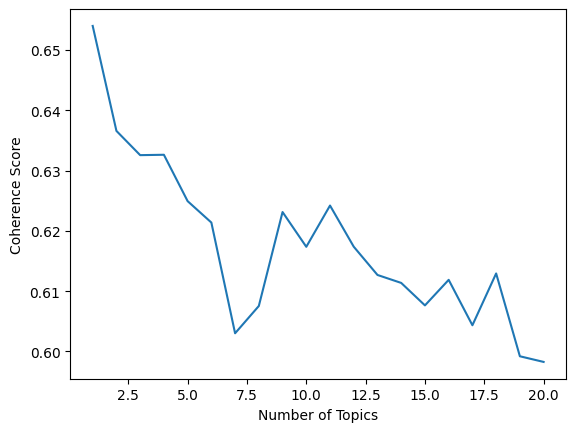

In [149]:
topics = list(range(1,21))
score = []
for i in topics:
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             iterations=10,
                             num_topics=i,
                             passes=10,
                             workers=6,
                             random_state=100)
    cm = CoherenceModel(model=lda_model,
                        texts=df["Tokens_with_Bigrams"],
                        corpus=corpus,
                        dictionary=dictionary,
                        coherence='c_v')
    cs = cm.get_coherence()
    score.append(cs)
    print(f"i: {i} || Score: {cs}")

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [183]:
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         iterations=100,
                         num_topics=5,
                         workers=4,
                         passes=100)

In [184]:
lda_model.print_topics(-1)

[(0,
  '0.018*"system" + 0.013*"model" + 0.013*"software" + 0.011*"language" + 0.009*"program" + 0.007*"base" + 0.006*"design" + 0.006*"development" + 0.005*"approach" + 0.005*"programming"'),
 (1,
  '0.012*"system" + 0.010*"design" + 0.009*"user" + 0.008*"problem" + 0.007*"research" + 0.006*"base" + 0.006*"agent" + 0.006*"environment" + 0.005*"interaction" + 0.005*"study"'),
 (2,
  '0.010*"model" + 0.009*"method" + 0.009*"image" + 0.009*"algorithm" + 0.007*"base" + 0.007*"problem" + 0.007*"datum" + 0.006*"feature" + 0.005*"approach" + 0.005*"propose"'),
 (3,
  '0.015*"network" + 0.011*"service" + 0.009*"application" + 0.009*"system" + 0.007*"performance" + 0.007*"resource" + 0.006*"cloud" + 0.006*"datum" + 0.005*"computing" + 0.005*"base"'),
 (4,
  '0.011*"datum" + 0.010*"information" + 0.010*"system" + 0.009*"network" + 0.007*"research" + 0.007*"model" + 0.006*"study" + 0.005*"analysis" + 0.005*"security" + 0.005*"neural"')]

## HDP

Hierarchical Dirichlet Process (HDP) is an unsupervised topic model which figures out the number of topics on its own.

In [152]:
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_model.show_topics()

[(0,
  '0.009*system + 0.007*model + 0.006*thesis + 0.006*base + 0.005*datum + 0.004*problem + 0.004*network + 0.004*approach + 0.004*method + 0.004*application + 0.004*design + 0.004*research + 0.003*user + 0.003*information + 0.003*technique + 0.003*algorithm + 0.003*use + 0.003*time + 0.003*study + 0.003*propose'),
 (1,
  '0.012*system + 0.007*model + 0.006*thesis + 0.006*base + 0.005*network + 0.004*design + 0.004*problem + 0.004*application + 0.004*approach + 0.004*research + 0.004*datum + 0.004*information + 0.003*use + 0.003*user + 0.003*process + 0.003*method + 0.003*technique + 0.003*study + 0.003*software + 0.003*time'),
 (2,
  '0.010*system + 0.007*model + 0.006*base + 0.005*thesis + 0.005*problem + 0.004*datum + 0.004*approach + 0.004*design + 0.004*technique + 0.004*method + 0.004*software + 0.004*language + 0.004*network + 0.004*information + 0.004*time + 0.003*application + 0.003*use + 0.003*research + 0.003*process + 0.003*development'),
 (3,
  '0.008*system + 0.004*bas

Why are words like 'system', 'thesis', 'method' coming up in the topics? I thought we were meant to delete these from the dictionary?

Going to remove them and try again and use TFIDF stuff...

## Just counting frequencies

Okay, lets not do topic modelling to find trends, let's just count frequencies of words and bigrams...

Every single word/bigram is going to be a row, and then we also record the year of the thesis. We use this to create a pivot table on the words and aggregate by decade. Focusing on just titles for now...